# loading the dataset local

In [ ]:
import pandas as pd

In [15]:
df = pd.read_csv('dataset/emails.csv', nrows=30000)

In [16]:
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [17]:
mail = df['message'][0]
mail

"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: tim.belden@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Tim Belden <Tim Belden/Enron@EnronXGate>\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nHere is our forecast\n\n "

# text preprocessing

In [13]:
import re
import numpy as np

def extract_email_info(email_text):
    """
    Extracts specific fields from an email text and returns them as a dictionary.
    :param email_text: Raw email string
    :return: Dictionary with extracted fields
    """
    fields = {
        "Date": None,
        "From": None,
        "To": None,
        "Subject": None,
        "Body": None
    }
    
    # Extract headers using regex
    date_match = re.search(r"^Date: (.+)$", email_text, re.MULTILINE)
    from_match = re.search(r"^From: (.+)$", email_text, re.MULTILINE)
    to_match = re.search(r"^To: (.+)$", email_text, re.MULTILINE)
    subject_match = re.search(r"^Subject: (.*)$", email_text, re.MULTILINE)
    
    fields["Date"] = date_match.group(1).strip() if date_match else None
    fields["From"] = from_match.group(1).strip() if from_match else None
    fields["To"] = to_match.group(1).strip() if to_match else None
    fields["Subject"] = subject_match.group(1).strip() if subject_match else None
    
    # Extract body (after headers, separated by a blank line)
    body_match = re.split(r"\n\n", email_text, maxsplit=1)
    fields["Body"] = body_match[1].strip() if len(body_match) > 1 else None
    
    return fields

In [89]:
n = 300
mail = df['message'][n]

mail = extract_email_info(mail)
mail

{'Date': 'Mon, 23 Apr 2001 13:40:00 -0700 (PDT)',
 'From': 'phillip.allen@enron.com',
 'To': 'andrea.richards@enron.com',
 'Subject': 'Re: Analyst Bryan Hull',
 'Body': "Andrea,\n\nAfter reviewing Bryan Hull's resume, I think he would be best suited for the trading track program.  Please forward his resume to Karen Buckley.\n\nPhillip"}

In [91]:
char_len_list = []

for n, mail in enumerate(df['message']):
    mail = extract_email_info(mail)

    if mail['Body']=="":
        print(f"error at : {n}")

    char_len_list.append(len(mail['Body']))

char_len_list= np.array(char_len_list)

# data visualization

In [92]:
print("### stats for mail body")

print(f"mean : {int(char_len_list.mean())}, median : {int(np.median(char_len_list))}, min : {min(char_len_list)}, max : {max(char_len_list)}")

### stats for mail body
mean : 1764, median : 713, min : 2, max : 272034


In [93]:
import matplotlib.pyplot as plt

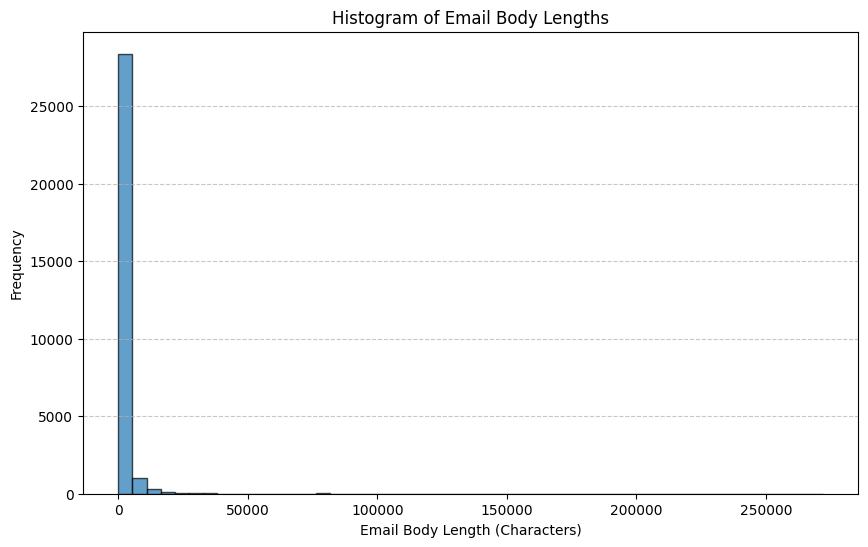

In [94]:
plt.figure(figsize=(10, 6))
plt.hist(char_len_list, bins=50, edgecolor='black', alpha=0.7)

plt.xlabel("Email Body Length (Characters)")
plt.ylabel("Frequency")
plt.title("Histogram of Email Body Lengths")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

the mail body messages are mostly around 700 characters, but very huge mails are skewing the dataset
<br>
we can exclude them from our analysis
<br>
we will now set a character length with an educated guess of 1000 words (5.5 characters in an average word)

In [ ]:
large_char_len = 1000*5

In [96]:
large_mails = []


for n, i in enumerate(char_len_list):
    if i>large_char_len:
        large_mails.append(n)

print(len(large_mails), round(len(large_mails)/len(char_len_list), 2))

1830 0.06


In [97]:
n = 300
mail = df['message'][large_mails[n]]

mail = extract_email_info(mail)
print(mail['Body'])

Dynegy Issues Statement On Enron Merger Status
Business Wire, 11/21/01
Enron says repayment of 690 mln usd debt extended until mid-Dec
AFX News, 11/21/01
USA: Enron secures credit line as shares fall.
Reuters English News Service, 11/21/01
Enron stock free-fall continues
Associated Press Newswires, 11/21/01
Enron Closes On $450M Secured Credit Line
Dow Jones News Service, 11/21/01
USA: UPDATE 1-Enron shares fall further on credit concerns.
Reuters English News Service, 11/21/01
USA: Enron shares tumble on credit concerns.
Reuters English News Service, 11/21/01
Upgrades and Downgrades
CNNfn: Market Coverage - Morning, 11/21/01
USA: RESEARCH ALERT-Enron, Dynegy cut by Goldman.
Reuters English News Service, 11/21/01
Enron Gets Extension on $690 Mln Note Due Next Week (Update1)
Bloomberg, 11/21/01

Enron, Dynegy Shares Fall 2nd Day on Threat to Buyout (Update2)
Bloomberg, 11/21/01

U.S. Equity Movers: Cardiac Science, Enron, Guidant, TriQuint
Bloomberg, 11/21/01

Enron, Dynegy Shares Fall 

we can see that most long mails are just contracts or things like that, than a conversation

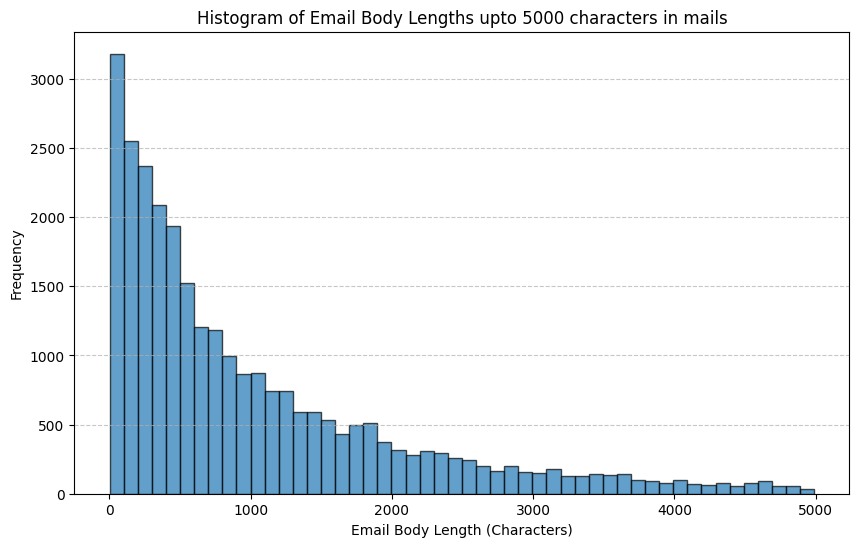

In [98]:
plt.figure(figsize=(10, 6))
plt.hist([i for i in char_len_list if i<large_char_len], bins=50, edgecolor='black', alpha=0.7)

plt.xlabel("Email Body Length (Characters)")
plt.ylabel("Frequency")
plt.title(f"Histogram of Email Body Lengths upto {large_char_len} characters in mails")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

we can now see that most mails are under 3000 charater long

# sentiment classification with LLM

In [99]:
from dotenv import load_dotenv
import os
from groq import Groq

load_dotenv("utils/.env",override=True)  # Load .env file

GROQ_API_KEY = os.getenv("GROQ_API_KEY")

In [101]:
class groq_model:
    def __init__(self, model="gemma2-9b-it"):
        self.client = Groq(api_key=os.getenv("GROQ_API_KEY"))
        self.model_name = model

    def get_response(self, query):
        chat_completion = self.client.chat.completions.create(
                messages=[
                    {
                        "role": "user",
                        "content": query,
                    }
                ],
                model=self.model_name,
                
            )
        
        return chat_completion.choices[0].message.content

## prepare a small dataset

In [104]:
import json
from time import sleep
import re
def extract_json_from_text(text):
    pattern = r'```json\s*(\{[\s\S]*?\})\s*```'
    match = re.search(pattern, text, re.DOTALL)
    
    if match:
        json_str = match.group(1)
    else:
        # Fallback: try to extract any JSON object from the text
        match = re.search(r'(\{[\s\S]*\})', text)
        if match:
            json_str = match.group(1)
        else:
            return None

    try:
        data = json.loads(json_str)
        # Optionally verify the expected structure:
        if "response" in data and isinstance(data["response"], list):
            return data
        else:
            print("JSON does not match the expected format (missing 'response' key or it is not a list).")
            return None
    except json.JSONDecodeError as e:
        print("Error decoding JSON:", e)
        return None

In [105]:
with open("utils/prompts/detect-classification.txt", "r") as f:
    prompt = f.read()

with open("utils/sentiments.json", "r") as f:
    sentiment_classes = json.load(f)

In [106]:
sentiment_classes

['Positive', 'Negative', 'Neutral']

In [107]:
sentiments_str = ""

for i, s in enumerate(sentiment_classes):
    sentiments_str+=f"{i+1}. {s}\n"
sentiments_str

'1. Positive\n2. Negative\n3. Neutral\n'

In [ ]:
small_data = []
sm_db_size = 200
done_num = 0
idx = 0

sleep_time = 10

model = groq_model()

while done_num<sm_db_size:

    mail = df['message'][idx]

    
    main_mail = extract_email_info(mail)
    mail = main_mail["Body"]

    if len(mail)>large_char_len:
        idx+=1
        continue

    try:
        query = prompt.replace("$#emailbody#$", mail).replace("$#sentiment-categories#$", sentiments_str)
        response = model.get_response(query)

        # print(response)

        result_class = extract_json_from_text(response)['response']


        highest_category = max(result_class, key=lambda x: x["probability"])

        mail_dict = {"body":mail, "class":highest_category["category_name"], "probability":highest_category["probability"], "Date":main_mail["Date"], 
                        "From":main_mail["From"],
                        "To":main_mail["To"],
                        "Subject":main_mail["Subject"]}

        small_data.append(mail_dict)
    
    except:
        print("Exception occured skipping this", idx)
        continue

    idx+=1
    done_num+=1

    print(f"done : {idx}")
    sleep(sleep_time)



Exception occured skipping this 0
done : 1


In [ ]:
with open("output/output.json", "w") as f:
    json.dump(small_data, f)

In [ ]:
import pandas as pd

In [ ]:
new_df = pd.DataFrame(small_data)
new_df.to_csv("output/output.csv")

In [ ]:
small_data[:3]

[{'body': 'Here is our forecast',
  'class': 'Neutral',
  'probability': 100,
  'Date': 'Mon, 14 May 2001 16:39:00 -0700 (PDT)',
  'From': 'phillip.allen@enron.com',
  'To': 'tim.belden@enron.com',
  'Subject': ''},
 {'body': "Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere take

In [ ]:
new_df.columns

Index(['body', 'class', 'probability', 'Date', 'From', 'To', 'Subject'], dtype='object')

[]

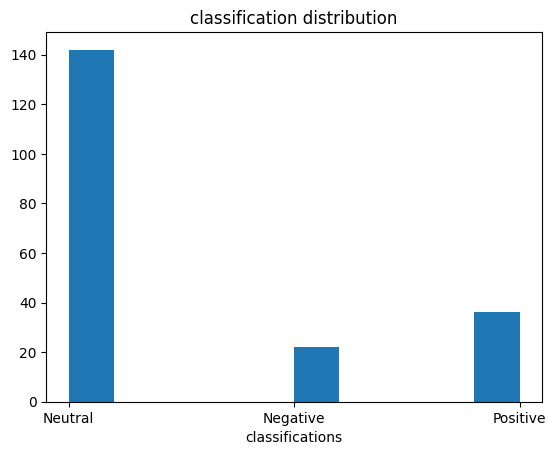

In [ ]:
plt.hist(new_df['class'])

plt.xlabel("classifications")
plt.title("classification distribution")
plt.plot()